In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [12]:
# Importing the Iris dataset
iris = datasets.load_iris()

In [13]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [14]:
X = iris.data[:, :4]
y = iris.target

In [15]:
# Training with 3 clusters and 300 iterations (default)
km = KMeans(n_clusters = 3)
# Compute k-means clustering with fit()
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


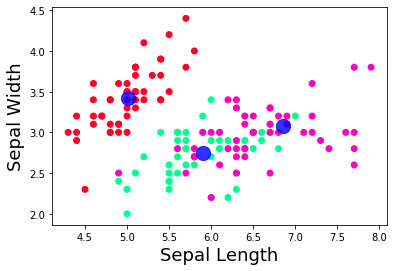

In [16]:
# Let's get a simple overview of our data

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

# Let's also identify the center points of the data

c_points = km.cluster_centers_
print(c_points)

plt.scatter(c_points[:, 0], c_points[:, 1], c='blue', s=200, alpha=0.8)

# We notice that the red datapoints are well clustered, but the pink and green ones may be harder to predict accurately. 

Text(0.5, 1.0, 'Predicted')

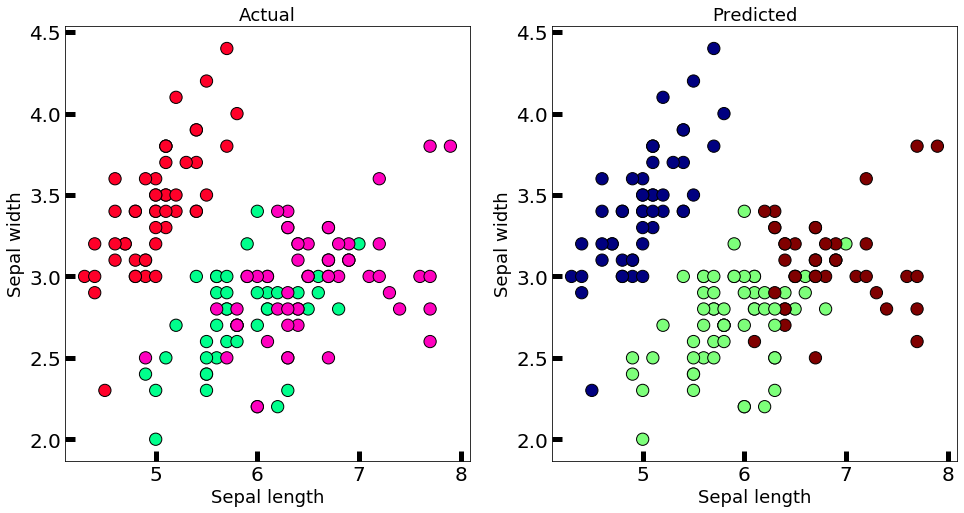

In [17]:
# Let's compare our original data versus our clustered results using the following code

#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
#plt.scatter(c_points[:, 0], c_points[:, 1], c='blue', s=200, alpha=0.8)
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [18]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
print(new_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


## I have also created a for loop which compares the predicted labels compared to the actual labels

In [20]:
# However, sometimes 0 is changed with 1 and 1 with 0, which makes the loop print many more errors than there actually are
for i in range(150): 
    wrong = []
    if(y[i] != new_labels[i]):
        wrong.append(i)
        print("Predicted datapoint number ", wrong, " is inaccurate.")

Predicted datapoint number  [52]  is inaccurate.
Predicted datapoint number  [77]  is inaccurate.
Predicted datapoint number  [101]  is inaccurate.
Predicted datapoint number  [106]  is inaccurate.
Predicted datapoint number  [113]  is inaccurate.
Predicted datapoint number  [114]  is inaccurate.
Predicted datapoint number  [119]  is inaccurate.
Predicted datapoint number  [121]  is inaccurate.
Predicted datapoint number  [123]  is inaccurate.
Predicted datapoint number  [126]  is inaccurate.
Predicted datapoint number  [127]  is inaccurate.
Predicted datapoint number  [133]  is inaccurate.
Predicted datapoint number  [138]  is inaccurate.
Predicted datapoint number  [142]  is inaccurate.
Predicted datapoint number  [146]  is inaccurate.
Predicted datapoint number  [149]  is inaccurate.


# Analysis

## Advantages 
### K-Means is simple and computationally efficient.
### It is very intuitive and their results are easy to visualize. 

## Disadvantages: 
### K-Means is highly scale dependent and is not suitable for data of varying shapes and densities.
### Evaluating results is more subjective. It requires much more human evaluation than trusted metrics.